https://matplotlib.org/stable/users/explain/quick_start.html
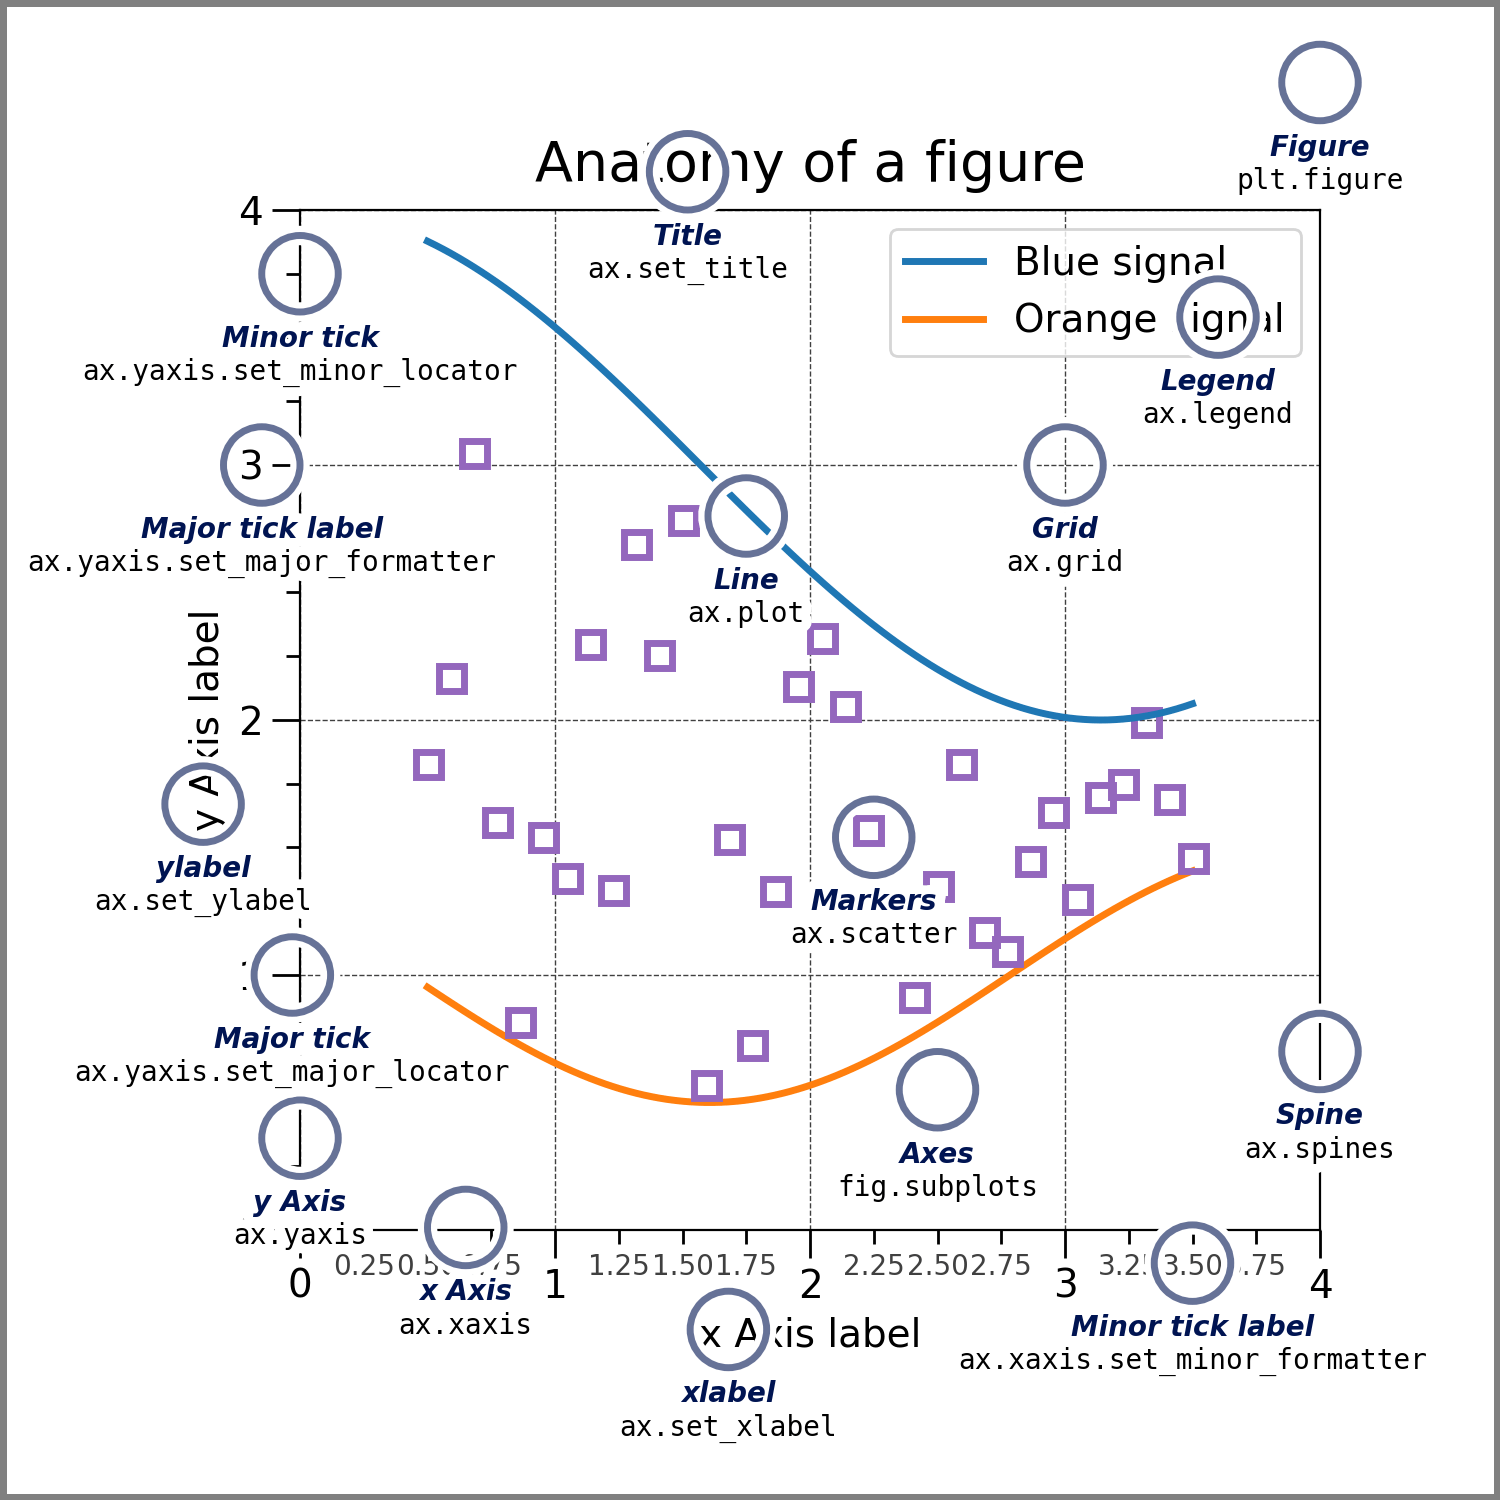

# Matplotlib

## Figure

This is the whole figure. The figure keeps track of all the child `Axes`, a group of 'special' Artists (titles, figure, legends, colorbars, etc), and even nested subfigures.

<Figure size 640x480 with 0 Axes>

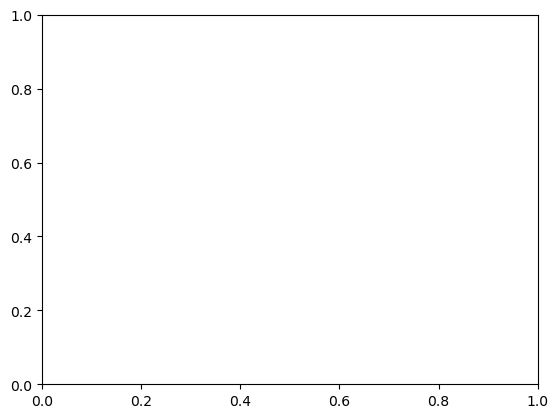

In [17]:
import numpy as np 
import matplotlib.pyplot as plt

fig = plt.figure()             # an empty figure with no Axes
fig, ax = plt.subplots()       # a figure with a single Axes

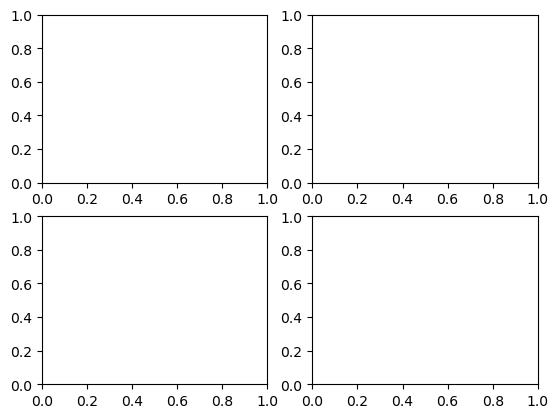

In [19]:
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes

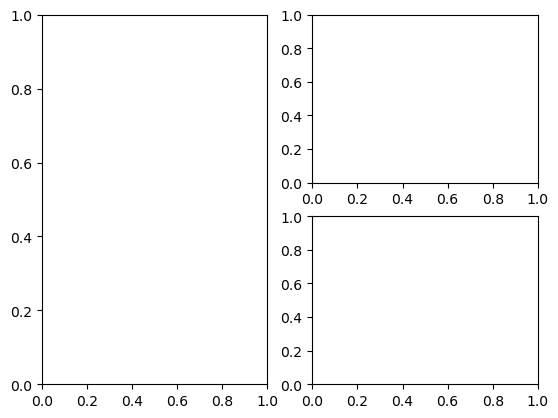

In [20]:
# a figure with one Axes on the left, and two on the right:
fig, axs = plt.subplot_mosaic([['left', 'right_top'],
                               ['left', 'right_bottom']])

`subplots()` and `subplot_mosaic` are convenience functions that additionally create Axes objects inside the Figure, but you can also manually add `Axes` later on.

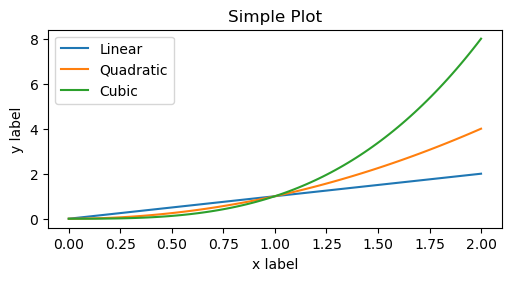

In [42]:
x = np.linspace(0,2,100)

# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(5,2.7), layout = 'constrained')
ax.plot(x,x, label= 'Linear')
ax.plot(x,x**2, label = 'Quadratic')
ax.plot(x,x**3,label = 'Cubic')
ax.set_xlabel('x label')
ax.set_ylabel('y label')
ax.set_title("Simple Plot")
ax.legend()

# Making a Helper Function

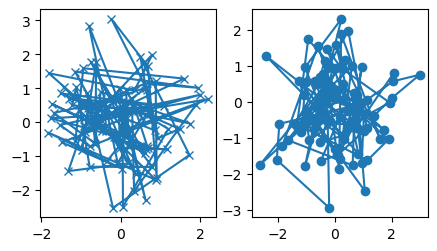

In [46]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph.
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

data1, data2, data3, data4 = np.random.randn(4, 100)  # make 4 random data sets
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 2.7))
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'})

## Styling Artists

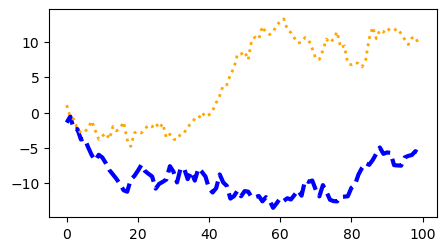

In [49]:
fig, ax = plt.subplots(figsize=(5, 2.7))
x = np.arange(len(data1))
ax.plot(x, np.cumsum(data1), color='blue', linewidth=3, linestyle='--')
l, = ax.plot(x, np.cumsum(data2), color='orange', linewidth=2)
l.set_linestyle(':')

## Colors

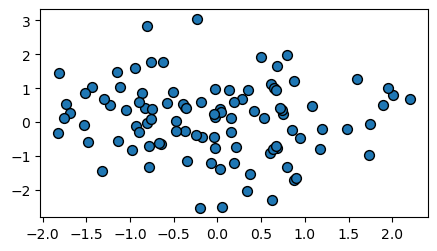

In [52]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.scatter(data1, data2, s=50, facecolor='C0', edgecolor='k')

## Linewidths, linestyles, and markersizes

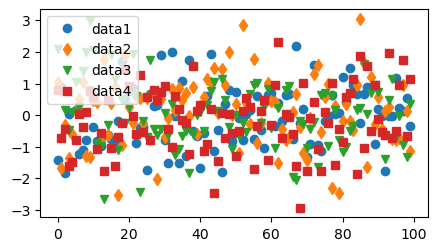

In [55]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(data1, 'o', label='data1')
ax.plot(data2, 'd', label='data2')
ax.plot(data3, 'v', label='data3')
ax.plot(data4, 's', label='data4')
ax.legend()

## Labelling plots

### Axes labels and text

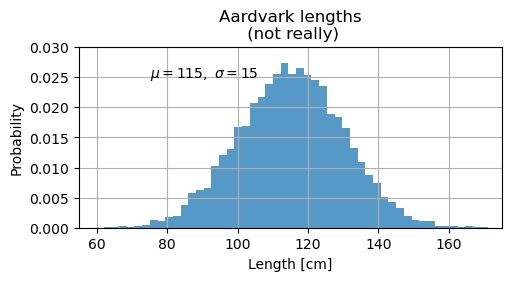

In [75]:
mu, sigma = 115, 15
x = mu + sigma * np.random.randn(10000)
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
# the histogram of the data
n, bins, patches = ax.hist(x, 50, density=True, facecolor='C0', alpha=0.75)

ax.set_xlabel('Length [cm]')
ax.set_ylabel('Probability')
ax.set_title('Aardvark lengths\n (not really)')
ax.text(75, .025, r'$\mu=115,\ \sigma=15$')
ax.axis([55, 175, 0, 0.03])

ax.grid(True)

# Examples

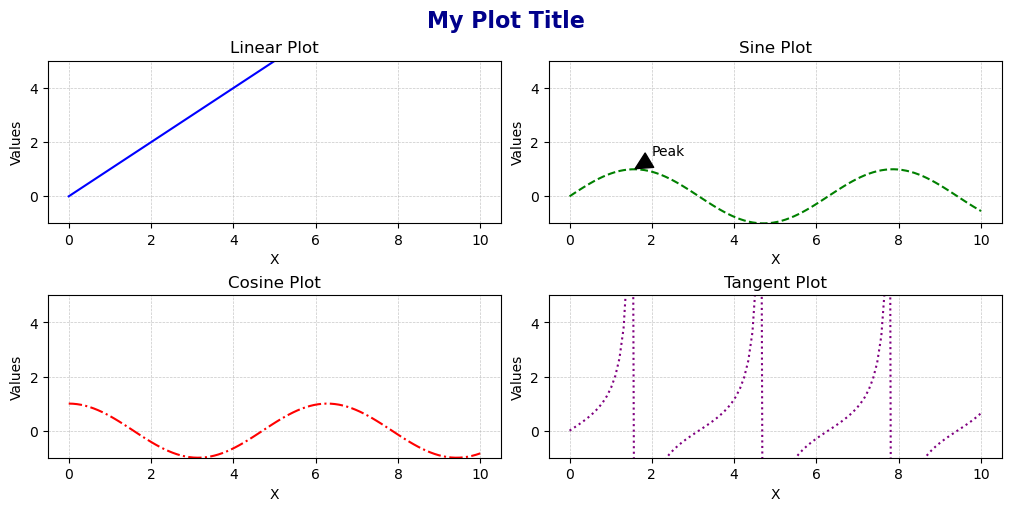

In [147]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 100)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 5), layout="constrained")
ax1, ax2, ax3, ax4 = ax.flatten()

# Plot 1: X
ax1.plot(x, x, color='blue', linestyle='-', label='y = x')
ax1.set_ylim(-1, 5)
ax1.set_xlabel("X")
ax1.set_ylabel("Values")
ax1.set_title("Linear Plot")
ax1.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Plot 2: Sin(X)
ax2.plot(x, np.sin(x), color='green', linestyle='--', label='y = sin(x)')
ax2.set_ylim(-1, 5)
ax2.set_xlabel("X")
ax2.set_ylabel("Values")
ax2.set_title("Sine Plot")
ax2.annotate("Peak", xy=(np.pi/2, 1), xytext=(2, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05))
ax2.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Plot 3: Cos(X)
ax3.plot(x, np.cos(x), color='red', linestyle='-.', label='y = cos(x)')
ax3.set_ylim(-1, 5)
ax3.set_xlabel("X")
ax3.set_ylabel("Values")
ax3.set_title("Cosine Plot")
ax3.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Plot 4: Tan(X)
ax4.plot(x, np.tan(x), color='purple', linestyle=':', label='y = tan(x)')
ax4.set_ylim(-1, 5)
ax4.set_xlabel("X")
ax4.set_ylabel("Values")
ax4.set_title("Tangent Plot")
ax4.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Set main title
fig.suptitle("My Plot Title", fontsize=16, fontweight='bold', color='darkblue')
plt.show()


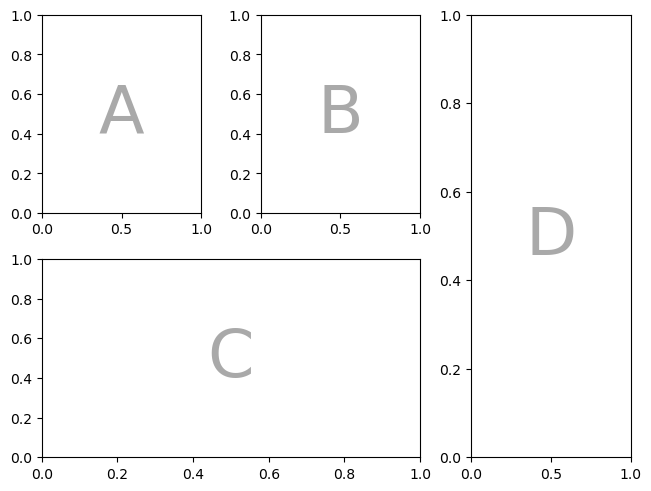

In [167]:
axd = plt.figure(layout="constrained").subplot_mosaic(
    """
    ABD
    CCD
    """
)
identify_axes(axd)

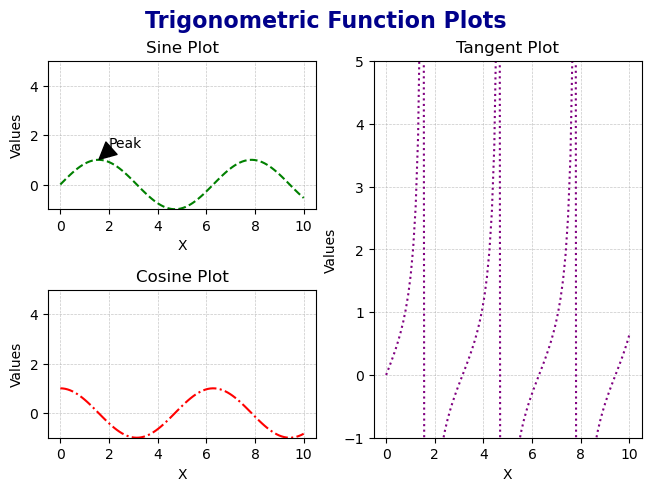

In [169]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 100)

# Create mosaic layout: 2 rows, with right column spanning both rows



fig = plt.figure(layout="constrained")
axd = fig.subplot_mosaic([["sin", "tan"],
                              ["cos", "tan"],],)


# Sine Plot
axd["sin"].plot(x, np.sin(x), color='green', linestyle='--', label='y = sin(x)')
axd["sin"].set_ylim(-1, 5)
axd["sin"].set_xlabel("X")
axd["sin"].set_ylabel("Values")
axd["sin"].set_title("Sine Plot")
axd["sin"].annotate("Peak", xy=(np.pi/2, 1), xytext=(2, 1.5),
                    arrowprops=dict(facecolor='black', shrink=0.05))
axd["sin"].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Cosine Plot
axd["cos"].plot(x, np.cos(x), color='red', linestyle='-.', label='y = cos(x)')
axd["cos"].set_ylim(-1, 5)
axd["cos"].set_xlabel("X")
axd["cos"].set_ylabel("Values")
axd["cos"].set_title("Cosine Plot")
axd["cos"].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Tangent Plot (spans both rows)
axd["tan"].plot(x, np.tan(x), color='purple', linestyle=':', label='y = tan(x)')
axd["tan"].set_ylim(-1, 5)
axd["tan"].set_xlabel("X")
axd["tan"].set_ylabel("Values")
axd["tan"].set_title("Tangent Plot")
axd["tan"].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Main Title
fig.suptitle("Trigonometric Function Plots", fontsize=16, fontweight='bold', color='darkblue')

plt.show()
